## PhishingWebsites

- One of the challenges faced by our research was the unavailability of reliable training datasets. In fact this challenge faces any researcher in the field. However, although plenty of articles about predicting phishing websites have been disseminated these days, no reliable training dataset has been published publically, may be because there is no agreement in literature on the definitive features that characterize phishing webpages, hence it is difficult to shape a dataset that covers all possible features.
In this dataset, we shed light on the important features that have proved to be sound and effective in predicting phishing websites. In addition, we propose some new features.


In [2]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import fetch_openml

- fetching Phishing Dataset from open ml

In [3]:
df = fetch_openml(data_id=4534,as_frame=True).frame

In [4]:
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


- Checking for column names from dataset

In [5]:
df.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

- Data set information like null values, datatypes

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   having_IP_Address            11055 non-null  category
 1   URL_Length                   11055 non-null  category
 2   Shortining_Service           11055 non-null  category
 3   having_At_Symbol             11055 non-null  category
 4   double_slash_redirecting     11055 non-null  category
 5   Prefix_Suffix                11055 non-null  category
 6   having_Sub_Domain            11055 non-null  category
 7   SSLfinal_State               11055 non-null  category
 8   Domain_registeration_length  11055 non-null  category
 9   Favicon                      11055 non-null  category
 10  port                         11055 non-null  category
 11  HTTPS_token                  11055 non-null  category
 12  Request_URL                  11055 non-null  category
 13  U

- as all the columns are category type so converting them into int datatype

In [7]:
cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int8 
 1   URL_Length                   11055 non-null  int8 
 2   Shortining_Service           11055 non-null  int8 
 3   having_At_Symbol             11055 non-null  int8 
 4   double_slash_redirecting     11055 non-null  int8 
 5   Prefix_Suffix                11055 non-null  int8 
 6   having_Sub_Domain            11055 non-null  int8 
 7   SSLfinal_State               11055 non-null  int8 
 8   Domain_registeration_length  11055 non-null  int8 
 9   Favicon                      11055 non-null  int8 
 10  port                         11055 non-null  int8 
 11  HTTPS_token                  11055 non-null  int8 
 12  Request_URL                  11055 non-null  int8 
 13  URL_of_Anchor                11055 non-null  i

- Dataset rows and columns count

In [24]:
df.Result.unique()

array([0, 1], dtype=int8)

In [26]:
df.Result.value_counts(normalize=True)

1    0.556943
0    0.443057
Name: Result, dtype: float64

In [9]:
df.shape

(11055, 31)

-Creating X and y vaiables

In [10]:
target = 'Result'
X = df.drop(target,axis=1)
y = df.loc[:,target]

-spliting entire dataset into train and test data which contains 1k records for test and 10k for train which will divide train data further into train and dev dataset(8.6k)

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.095,random_state=578)
X_train.shape, X_test.shape,y_train.shape

((10004, 30), (1051, 30), (10004,))

In [12]:
X_train,X_train_dev, y_train,y_train_dev = train_test_split(X_train,y_train,test_size=0.05,random_state=578)
X_train.shape,X_train_dev.shape, y_train.shape,y_train_dev.shape

((9503, 30), (501, 30), (9503,), (501,))

- Creating Logistic regression model

In [13]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train,y_train)
log_pred = log_model.predict(X_train_dev)

- Evaluating model for dev dataset by confusion matrix

In [14]:
from sklearn.metrics import confusion_matrix,classification_report

In [23]:
log_pred[log_pred==1].sum()

287

In [15]:
confusion_matrix(y_train_dev,log_pred)

array([[192,  26],
       [ 22, 261]])

- here TP,TN,FP,FN are given in matrix
- out of 453 dev train samples
- 173 is True Negative: predicted correctly as not phishing websites
- 224 is True Positive: predicted correctly as phishing websites
- 14 is False Negative: predicted wrongly as not phishing websites
- 22 is False Positive: predicted wrongly as phishing websites

# so here False Positive(22) is importent because model predicting not phishing websites as phishing

In [16]:
print(classification_report(y_train_dev,log_pred,target_names=['not-phishing','phishing']))

              precision    recall  f1-score   support

not-phishing       0.90      0.88      0.89       218
    phishing       0.91      0.92      0.92       283

    accuracy                           0.90       501
   macro avg       0.90      0.90      0.90       501
weighted avg       0.90      0.90      0.90       501



- f1 score for phishing dataset is 92%
- recall will be 89% , it will increase False positive count reduces
- precision will be 92%, it will increase when False negative count reduces
- actually it is not phishing but predicted as phishing so recall should increase


In [17]:
from sklearn.metrics import ConfusionMatrixDisplay

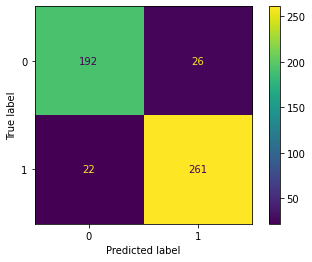

In [20]:
confusion = confusion_matrix(y_train_dev,log_pred)
ConfusionMatrixDisplay(confusion).plot()

## KNN Clasification

In [ ]:
!pip install neighbors

     |████████████████████████████████| 893 kB 6.7 MB/s 


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train,y_train)
knn_pred = knn_classifier.predict(X_train_dev)

In [ ]:
confusion_matrix(y_train_dev,knn_pred)

array([[180,  15],
       [  4, 254]])

In [ ]:
print(classification_report(y_train_dev,knn_pred,target_names=['not-phishing','phishing']))

              precision    recall  f1-score   support

not-phishing       0.98      0.92      0.95       195
    phishing       0.94      0.98      0.96       258

    accuracy                           0.96       453
   macro avg       0.96      0.95      0.96       453
weighted avg       0.96      0.96      0.96       453



- f1 score for phishing dataset is 96%
- recall will be 94% , it will increase False negative count reduces
- precision will be 92%, it will increase when False positive count reduces
actually it is phishing but predicted as not phishing so recall should increase

## Decision Tree Clasification

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DS_clasify = DecisionTreeClassifier()
DS_clasify.fit(X_train,y_train)
DS_pred = DS_clasify.predict(X_train_dev)

In [ ]:
confusion_matrix(y_train_dev,DS_pred)

array([[185,  10],
       [ 10, 248]])

In [ ]:
print(classification_report(y_train_dev,knn_pred,target_names=['not-phishing','phishing']))

              precision    recall  f1-score   support

not-phishing       0.98      0.92      0.95       195
    phishing       0.94      0.98      0.96       258

    accuracy                           0.96       453
   macro avg       0.96      0.95      0.96       453
weighted avg       0.96      0.96      0.96       453



- f1 score for phishing dataset is 96%
- recall will be 94% , it will increase False negative count reduces
- precision will be 92%, it will increase when False positive count - reduces actually it is phishing but predicted as not phishing so recall should increase

# from Logistic Regression, KNN clasification, Decision Tree clasification algorithms for Training set we got better accuracy for Knn and Decision Tree algorthms with 96% f1 score

## Test set scores

In [ ]:
log_test = log_model.predict(X_test)
knn_test = knn_classifier.predict(X_test)
Ds_test = DS_clasify.predict(X_test)

In [ ]:
print("------------Logistic Reg-------------------")
print(confusion_matrix(y_test,log_test))
print("-------------Knn clasifier-----------------")
print(confusion_matrix(y_test,knn_test))
print("-------------Decision Tree------------------")
print(confusion_matrix(y_test,Ds_test))

------------Logistic Reg-------------------
[[399  65]
 [ 46 541]]
-------------Knn clasifier-----------------
[[425  39]
 [ 12 575]]
-------------Decision Tree------------------
[[441  23]
 [ 16 571]]


In [ ]:
print("------------Logistic Reg-------------------")
print(classification_report(y_test,log_test,target_names=['not-phishing','phishing']))
print("-------------Knn clasifier-----------------")
print(classification_report(y_test,knn_test,target_names=['not-phishing','phishing']))
print("-------------Decision Tree------------------")
print(classification_report(y_test,Ds_test,target_names=['not-phishing','phishing']))

------------Logistic Reg-------------------
              precision    recall  f1-score   support

not-phishing       0.90      0.86      0.88       464
    phishing       0.89      0.92      0.91       587

    accuracy                           0.89      1051
   macro avg       0.89      0.89      0.89      1051
weighted avg       0.89      0.89      0.89      1051

-------------Knn clasifier-----------------
              precision    recall  f1-score   support

not-phishing       0.97      0.92      0.94       464
    phishing       0.94      0.98      0.96       587

    accuracy                           0.95      1051
   macro avg       0.95      0.95      0.95      1051
weighted avg       0.95      0.95      0.95      1051

-------------Decision Tree------------------
              precision    recall  f1-score   support

not-phishing       0.96      0.95      0.96       464
    phishing       0.96      0.97      0.97       587

    accuracy                           0.96      

## for test data set from Logistic Reg, Knn clasifier, Decision tree 
- Decision Tree model predict good accuracy with 96% f1 score